In [1]:
import pandas as pd
import numpy as np
import my_net as mn

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
square_train = pd.read_csv('../data/regression/square-simple-training.csv', index_col=0)
steps_train = pd.read_csv('../data/regression/steps-large-training.csv', index_col=0)
square_test = pd.read_csv('../data/regression/square-simple-test.csv', index_col=0)
steps_test = pd.read_csv('../data/regression/steps-large-test.csv', index_col=0)
square_test_X = square_test[['x']].values
square_test_Y = square_test[['y']].values
steps_test_X = steps_test[['x']].values
steps_test_Y = steps_test[['y']].values

sigmoid = lambda a: 1 / (1 + np.exp(-a))
identity = lambda a: a

# square-simple

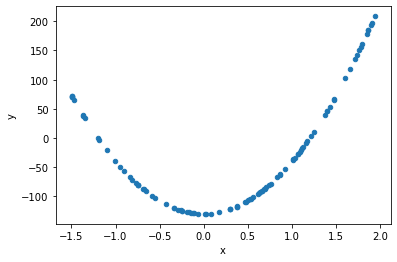

In [3]:
square_train.plot.scatter(x="x", y="y")

In [4]:
# rozpoznaję, że to funkcja kwadratowa f(x) = 90 * x^2 - 130
# probujemy przybliżyć to za pomocą następującej funkcji
# C + A * sigmoid(x-x_1) - A * sigmoid(x+x_1) + B * sigmoid(x-x_2) - B * sigmoid(x + x_2)

hidden_layer = np.array([1, 1, 1, 1, 0])
hidden_bias = np.array([-2.3, 2.3, -0.2, 0.2, 0])
hidden_layer_m = np.reshape(hidden_layer, (1, 5))
hidden_bias_m = np.reshape(hidden_bias, (1, 5))

output_layer = np.array([1275, -1275, 450, -450, 0])
output_bias = np.array([955])
output_layer_m = np.reshape(output_layer, (5, 1))
output_bias_m = np.reshape(output_bias, (1, 1))

net_square = mn.MyNet([hidden_layer_m, output_layer_m], [hidden_bias_m, output_bias_m], [sigmoid, identity])

preds_square = net_square.predict(square_test_X)
mean_squared_error(square_test_Y, preds_square)

8.95937445564052

MSE dopasowania wynosi niecałe 9.

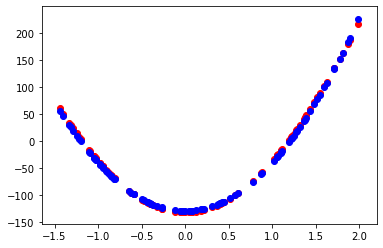

In [5]:
plt.scatter(square_test_X, preds_square, c='red')
plt.scatter(square_test_X, square_test_Y, c='blue')
plt.show()

Na powyższym wykresie niebieskimi punktami oznaczone są wartości ze zbioru testowego, a na czerwono otrzymane przez naszą sieć przybliżenia tych wartości.

# steps-large

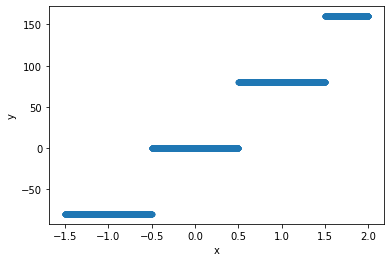

In [6]:
steps_train.plot.scatter(x="x", y="y")

In [7]:
# probujemy przybliżyć to za pomocą następującej funkcji
# sigmoid((x+0.5)*1000)*80 + sigmoid((x-0.5)*1000)*80 + sigmoid((x-1.5)*1000)*80 - 80

hidden_layer = np.array([1, 1, 1, 0, 0]) * 225
hidden_bias = np.array([0.5, -0.5, -1.5, 0, 0]) * 225
hidden_layer_m = np.reshape(hidden_layer, (1, 5))
hidden_bias_m = np.reshape(hidden_bias, (1, 5))

output_layer = np.array([80, 80, 80, 0, 0])
output_bias = np.array([-80])
output_layer_m = np.reshape(output_layer, (5, 1))
output_bias_m = np.reshape(output_bias, (1, 1))

net_steps = mn.MyNet([hidden_layer_m, output_layer_m], [hidden_bias_m, output_bias_m], [sigmoid, identity])

preds_steps = net_steps.predict(steps_test_X)
mean_squared_error(steps_test_Y, preds_steps)

8.851276074169645

MSE dopasowania wynosi około 8.85, czyli mniej niż 9.

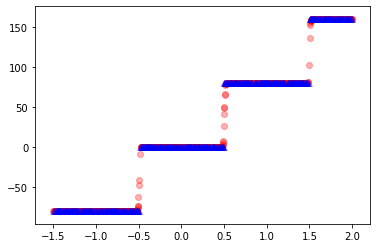

In [8]:
plt.scatter(steps_test_X, preds_steps, c='red', alpha=0.3)
plt.scatter(steps_test_X, steps_test_Y, c='blue', alpha=0.2, marker='^')
plt.show()

Na powyższym wykresie niebieskimi punktami oznaczone są wartości ze zbioru testowego, a na czerwono otrzymane przez naszą sieć przybliżenia tych wartości.